# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Muhammad Ardiansyah Asrifah]
- **Email:** [ancakiky@gmail.com]
- **ID Dicoding:** [ardnsyhsrifh]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda berbagi dari waktu ke waktu (harian, mingguan, bulanan)?
- Apakah ada perbedaan signifikan dalam penggunaan sepeda berbagi antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Importing essential libraries for data analysis
import pandas as pd
import numpy as np

# Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Importing statsmodels for statistical analysis
import statsmodels.api as sm

# Importing dateutil for date manipulation
from dateutil import parser

## Data Wrangling

### Gathering Data

In [3]:
file_path = '/content/day.csv'

In [4]:
# Reading the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

### Assessing Data

In [8]:
# Memeriksa struktur dataset
print("Dataframe's shape:", df.shape)
print("First few rows of the dataframe:")
print(df.head())
print("Last few rows of the dataframe:")
print(df.tail())

Dataframe's shape: (731, 16)
First few rows of the dataframe:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   

In [9]:
# Memeriksa informasi dataset
print("Dataframe info:")
print(df.info())

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [10]:
# Descriptive statistics untuk kolom numerik
print("Descriptive statistics:")
print(df.describe())

Descriptive statistics:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std

In [11]:
# Memeriksa nilai yang hilang
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [12]:
# Memeriksa duplikasi
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


### Cleaning Data

In [13]:
# Menghapus duplikasi
df.drop_duplicates(inplace=True)

In [14]:
# Memeriksa kembali duplikasi
print("Number of duplicate rows after cleaning:", df.duplicated().sum())

Number of duplicate rows after cleaning: 0


In [16]:
# Mengonversi kolom 'dteday' ke tipe data datetime
df['dteday'] = pd.to_datetime(df['dteday'])

In [17]:
# Memeriksa kembali tipe data
print("Data types after cleaning:")
print(df.dtypes)

Data types after cleaning:
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [18]:
# Menghapus outlier pada kolom 'cnt' (jumlah total peminjaman) jika lebih dari 3 standar deviasi dari mean
upper_limit = df['cnt'].mean() + 3 * df['cnt'].std()
lower_limit = df['cnt'].mean() - 3 * df['cnt'].std()
df = df[(df['cnt'] <= upper_limit) & (df['cnt'] >= lower_limit)]

In [19]:
# Memeriksa kembali dataset setelah pembersihan
print("Dataframe shape after cleaning:", df.shape)
print("First few rows after cleaning:")
print(df.head())

Dataframe shape after cleaning: (731, 16)
First few rows after cleaning:
   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  

## Exploratory Data Analysis (EDA)

### Explore ...

In [20]:
# Set style for plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

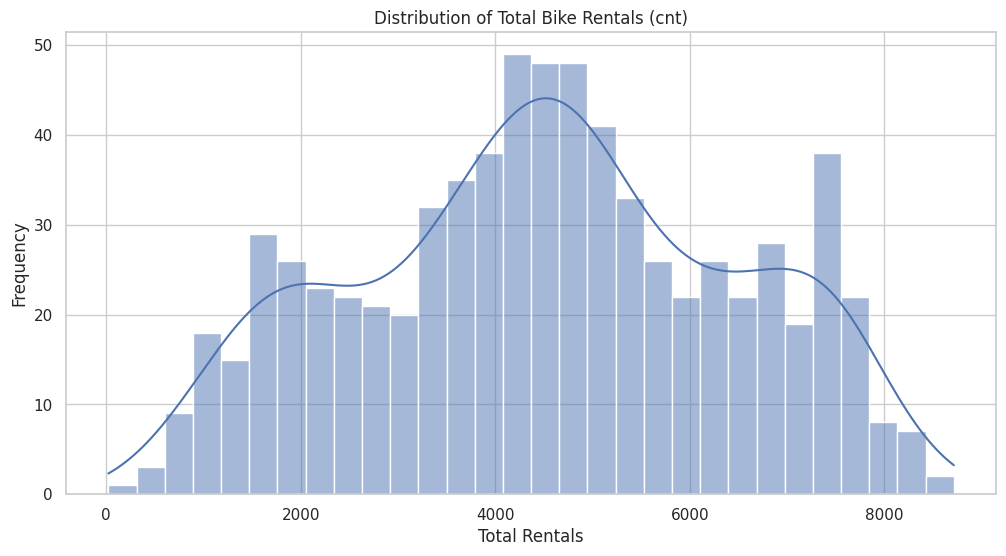

In [21]:
# 1. Distribusi variabel target
plt.figure(figsize=(12, 6))
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title('Distribution of Total Bike Rentals (cnt)')
plt.xlabel('Total Rentals')
plt.ylabel('Frequency')
plt.show()


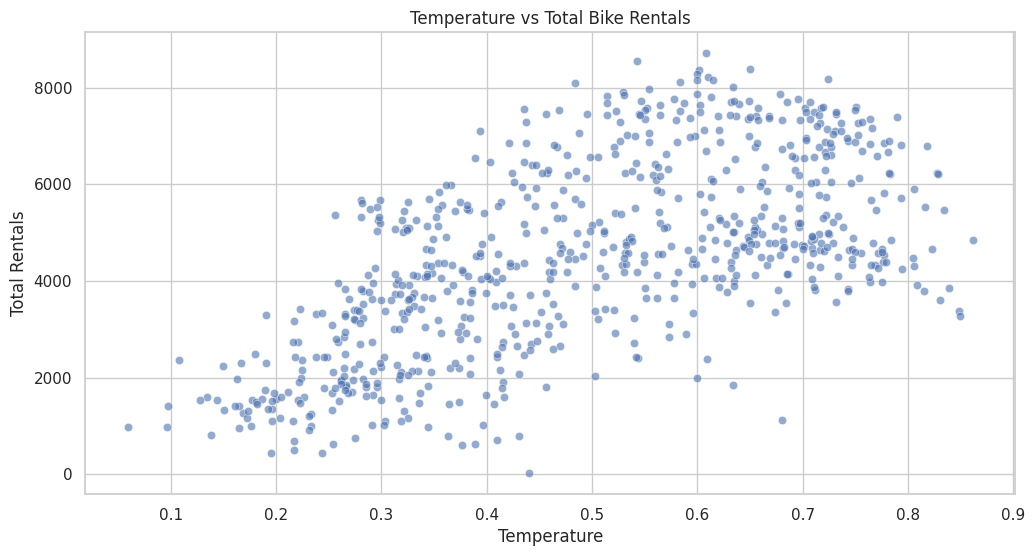

In [22]:
# 2. Hubungan antar variabel numerik
# Scatter plot antara temperatur dan jumlah total peminjaman
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='temp', y='cnt', alpha=0.6)
plt.title('Temperature vs Total Bike Rentals')
plt.xlabel('Temperature')
plt.ylabel('Total Rentals')
plt.show()

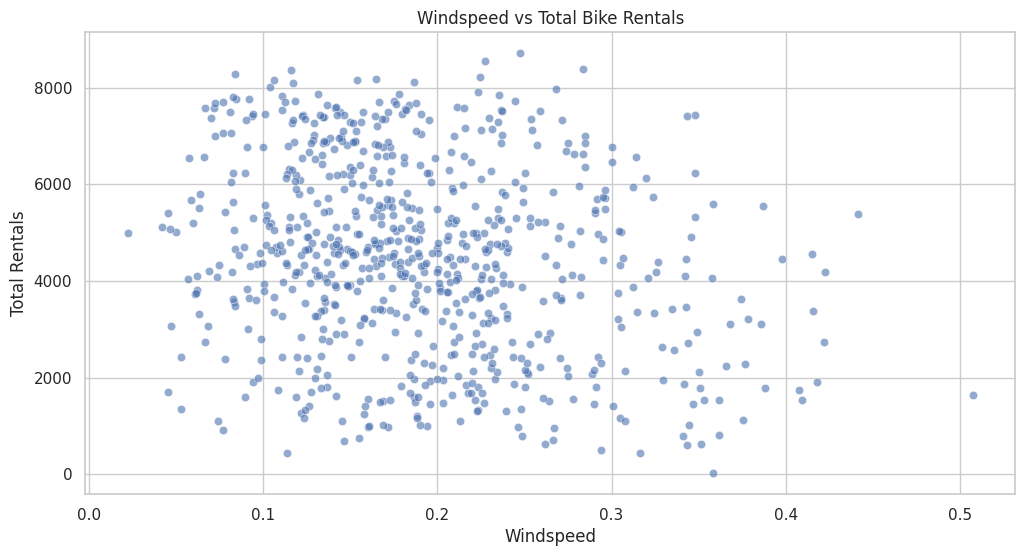

In [23]:
# Scatter plot antara kecepatan angin dan jumlah total peminjaman
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='windspeed', y='cnt', alpha=0.6)
plt.title('Windspeed vs Total Bike Rentals')
plt.xlabel('Windspeed')
plt.ylabel('Total Rentals')
plt.show()

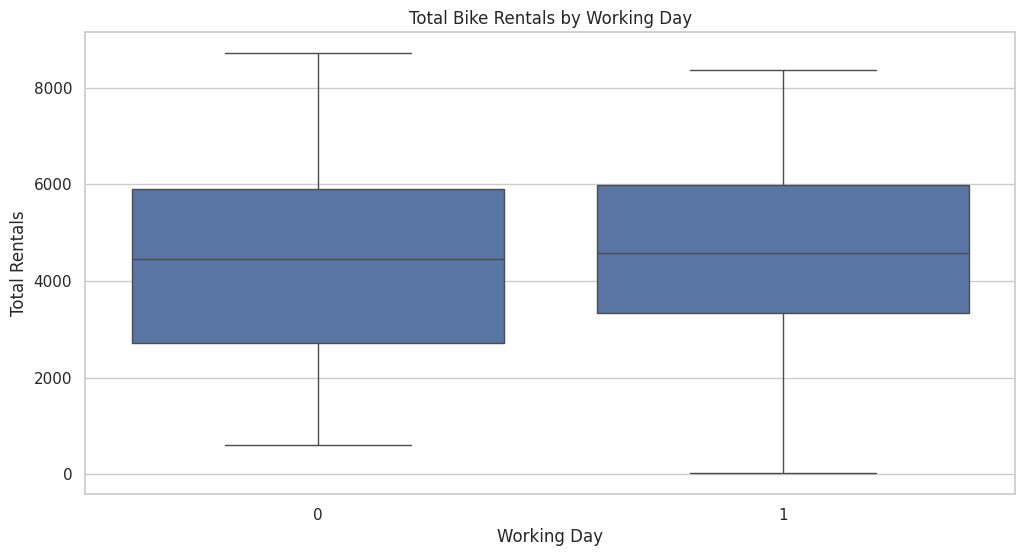

In [24]:
# 3. Analisis kategori
# Boxplot untuk melihat distribusi jumlah total peminjaman berdasarkan hari kerja
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='workingday', y='cnt')
plt.title('Total Bike Rentals by Working Day')
plt.xlabel('Working Day')
plt.ylabel('Total Rentals')
plt.show()

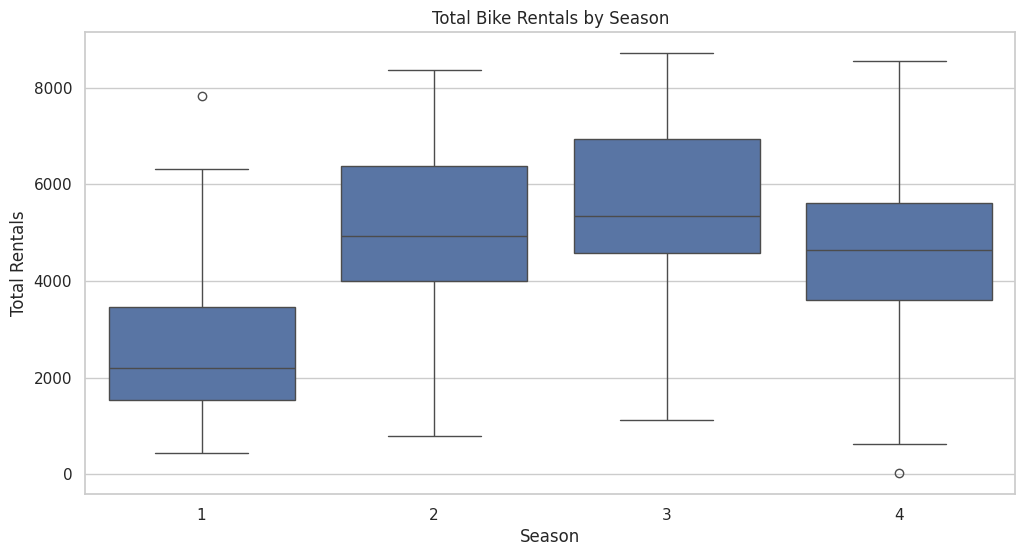

In [25]:
# Boxplot untuk melihat distribusi jumlah total peminjaman berdasarkan musim
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='season', y='cnt')
plt.title('Total Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.show()

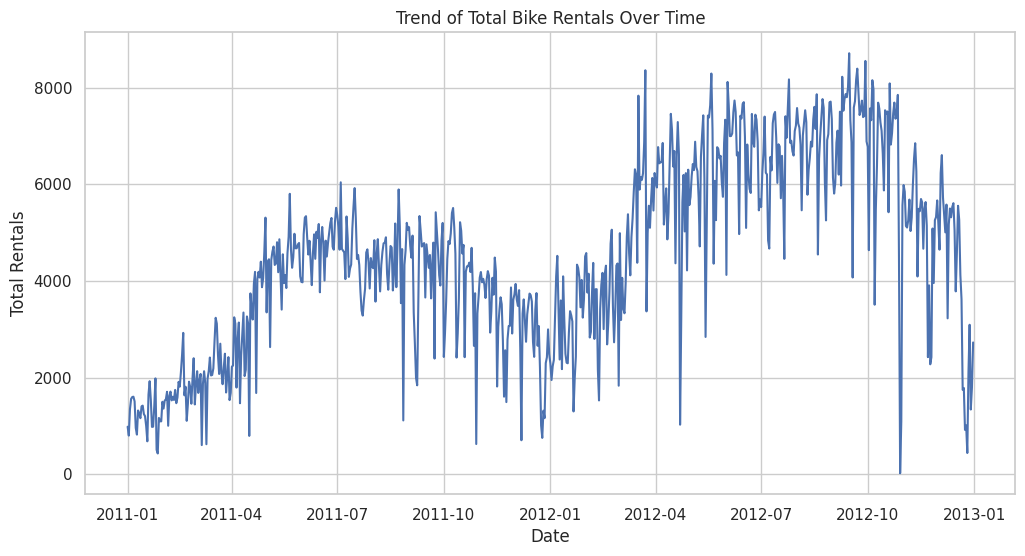

In [26]:
# 4. Visualisasi temporal
# Tren jumlah peminjaman sepeda sepanjang waktu
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='dteday', y='cnt')
plt.title('Trend of Total Bike Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.show()

In [27]:
# 5. Insight dan interpretasi
# Menampilkan statistik deskriptif untuk variabel numerik
print("Descriptive statistics for numerical variables:")
print(df.describe())

Descriptive statistics for numerical variables:
          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min   

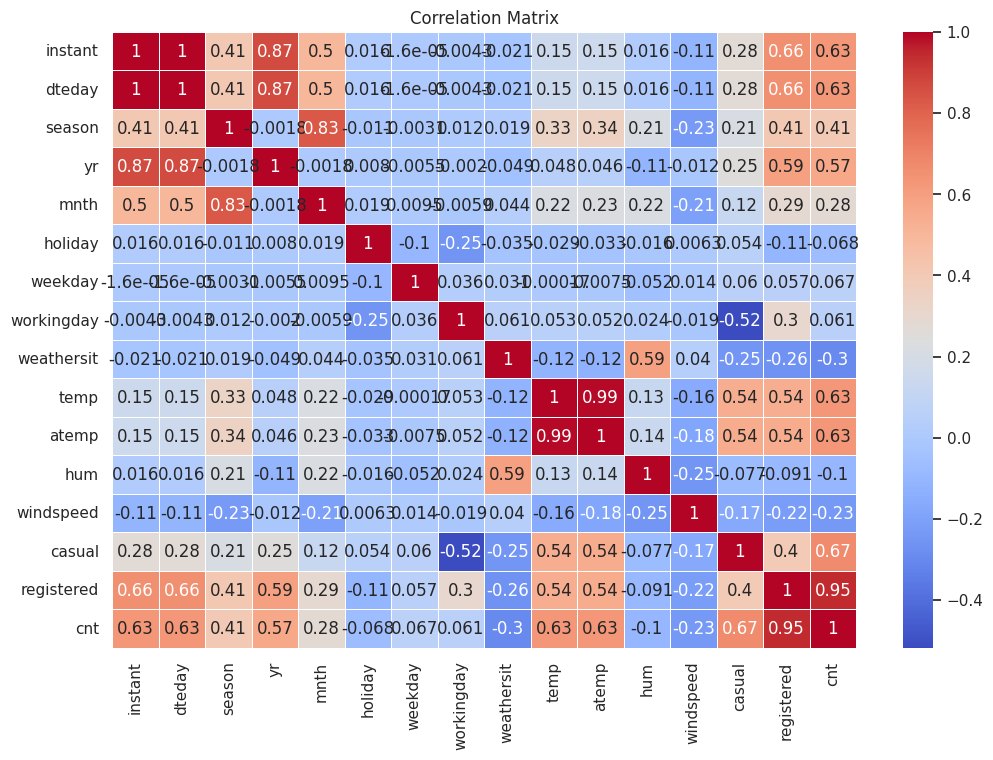

In [28]:
# Korelasi antar variabel
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [29]:
# Set style for plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

In [30]:
# Mengatur kolom 'dteday' sebagai indeks untuk analisis temporal
df.set_index('dteday', inplace=True)

In [31]:
# Resampling data untuk tren harian
daily_trend = df['cnt'].resample('D').sum()

In [42]:
# Tampilkan tren harian dalam bentuk tabel
print("Daily Trend of Bike Rentals:")
print(daily_trend.head(10))

Daily Trend of Bike Rentals:
dteday
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
2011-01-06    1606
2011-01-07    1510
2011-01-08     959
2011-01-09     822
2011-01-10    1321
Freq: D, Name: cnt, dtype: int64


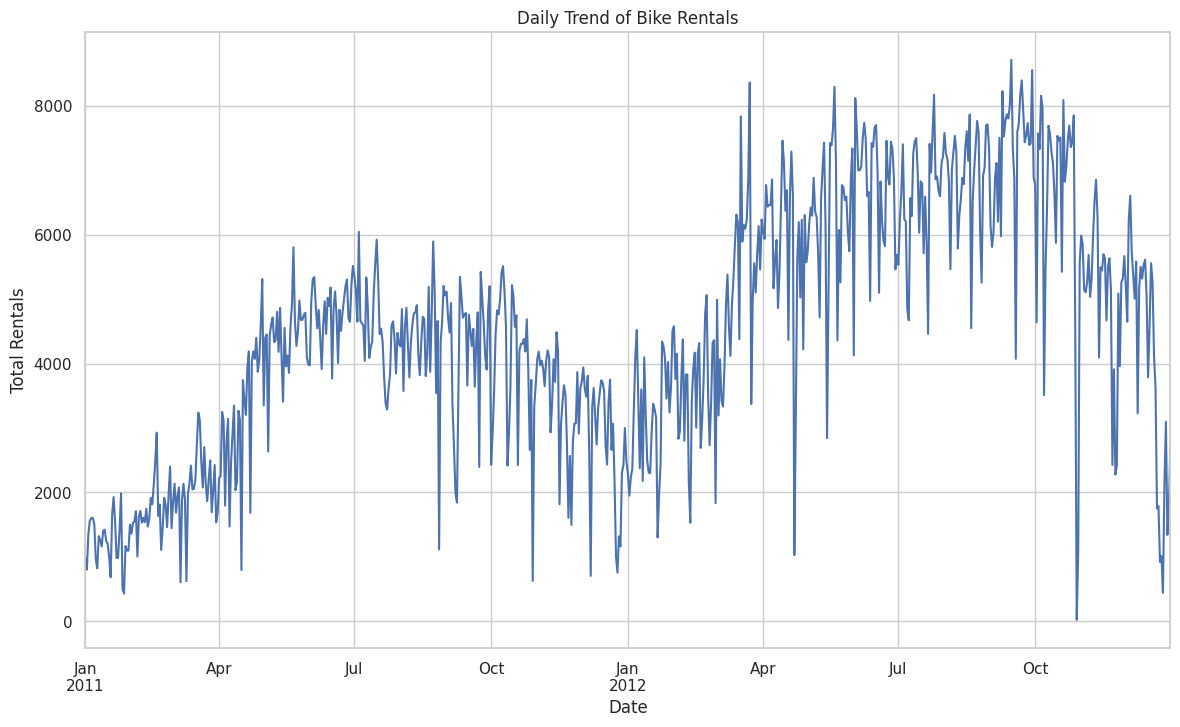

In [32]:
# Plot tren harian
plt.figure(figsize=(14, 8))
daily_trend.plot()
plt.title('Daily Trend of Bike Rentals')
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.show()

In [33]:
# Resampling data untuk tren mingguan
weekly_trend = df['cnt'].resample('W').sum()

In [43]:
# Tampilkan tren mingguan dalam bentuk tabel
print("Weekly Trend of Bike Rentals:")
print(weekly_trend.head(10))

Weekly Trend of Bike Rentals:
dteday
2011-01-02     1786
2011-01-09     9408
2011-01-16     9025
2011-01-23     8770
2011-01-30     7699
2011-02-06    10273
2011-02-13    11192
2011-02-20    14692
2011-02-27    12113
2011-03-06    11742
Freq: W-SUN, Name: cnt, dtype: int64


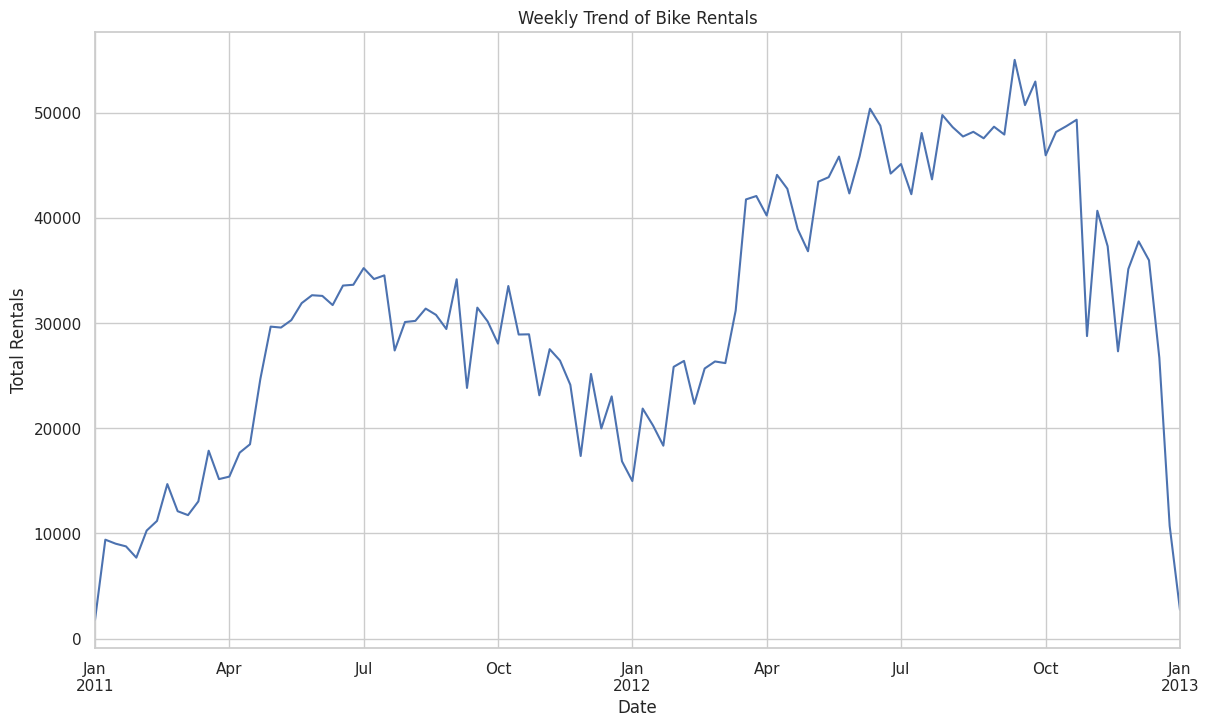

In [34]:
# Plot tren mingguan
plt.figure(figsize=(14, 8))
weekly_trend.plot()
plt.title('Weekly Trend of Bike Rentals')
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.show()

In [35]:
# Resampling data untuk tren bulanan
monthly_trend = df['cnt'].resample('M').sum()

In [44]:
# Tampilkan tren bulanan dalam bentuk tabel
print("Monthly Trend of Bike Rentals:")
print(monthly_trend.head(10))

Monthly Trend of Bike Rentals:
dteday
2011-01-31     38189
2011-02-28     48215
2011-03-31     64045
2011-04-30     94870
2011-05-31    135821
2011-06-30    143512
2011-07-31    141341
2011-08-31    136691
2011-09-30    127418
2011-10-31    123511
Freq: M, Name: cnt, dtype: int64


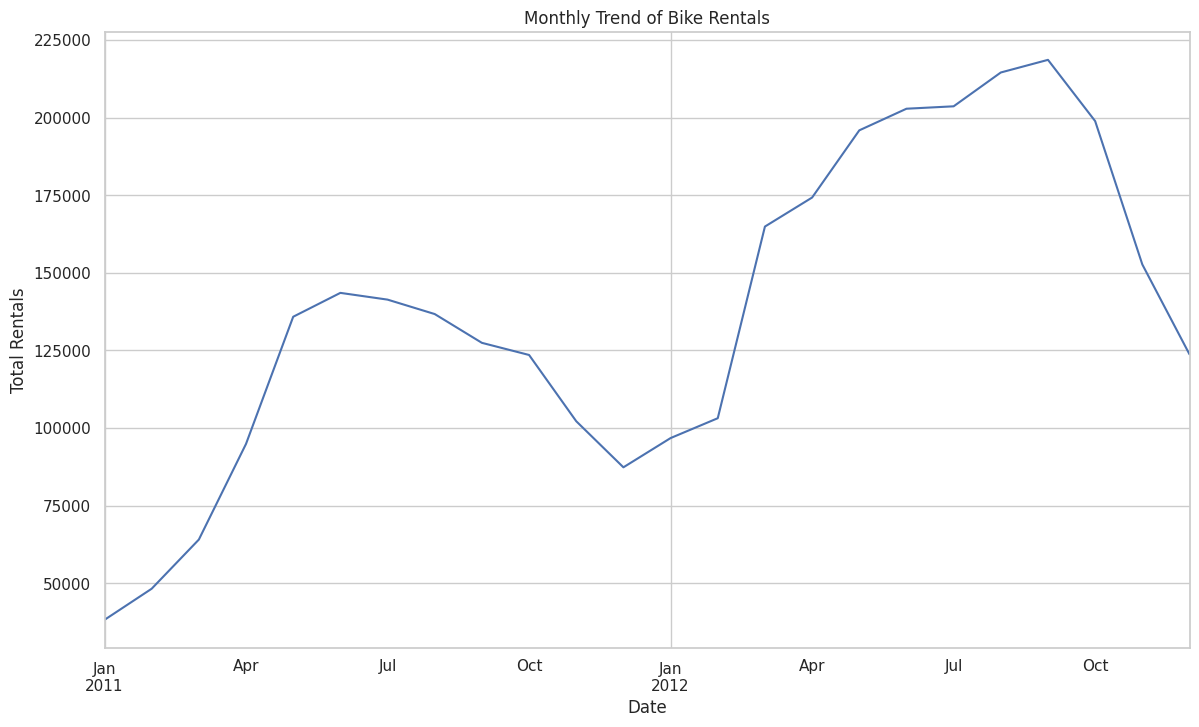

In [36]:
# Plot tren bulanan
plt.figure(figsize=(14, 8))
monthly_trend.plot()
plt.title('Monthly Trend of Bike Rentals')
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.show()

### Pertanyaan 2:

In [37]:
# Mengembalikan kolom 'dteday' sebagai kolom biasa
df.reset_index(inplace=True)

In [38]:
# Menambah kolom baru untuk menandai hari kerja atau akhir pekan
df['day_type'] = df['weekday'].apply(lambda x: 'Weekend' if x in [0, 6] else 'Weekday')

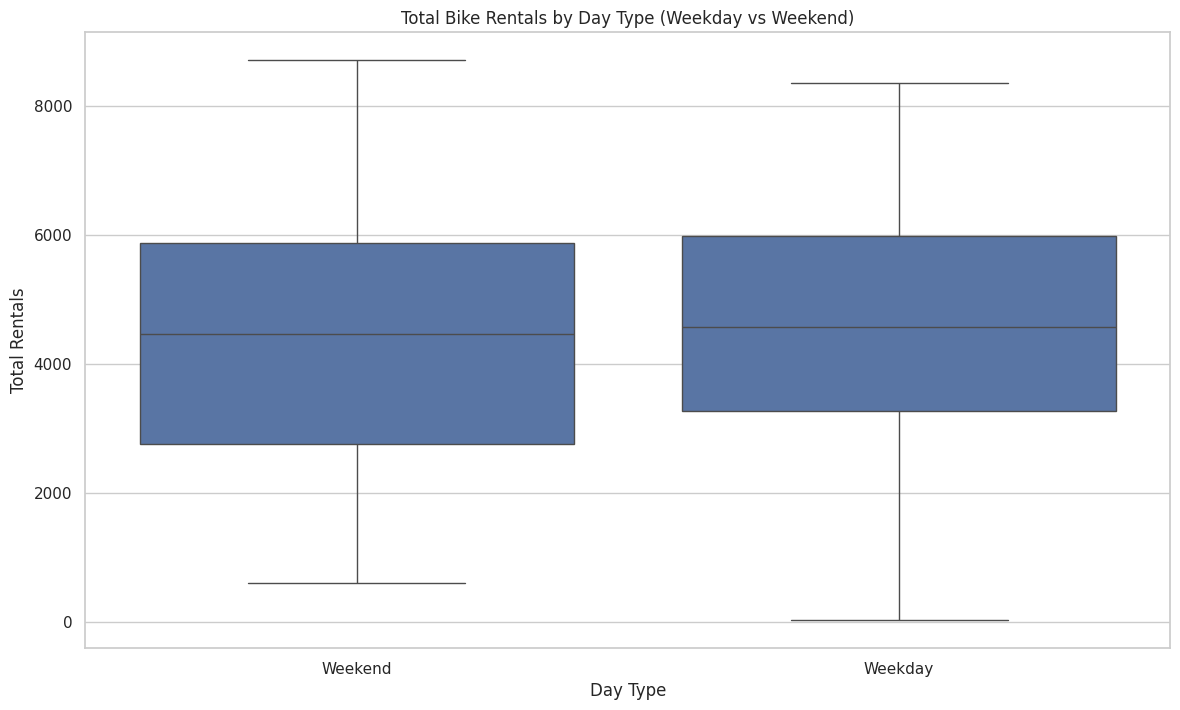

In [39]:
# Boxplot untuk melihat distribusi jumlah total peminjaman berdasarkan jenis hari
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='day_type', y='cnt')
plt.title('Total Bike Rentals by Day Type (Weekday vs Weekend)')
plt.xlabel('Day Type')
plt.ylabel('Total Rentals')
plt.show()

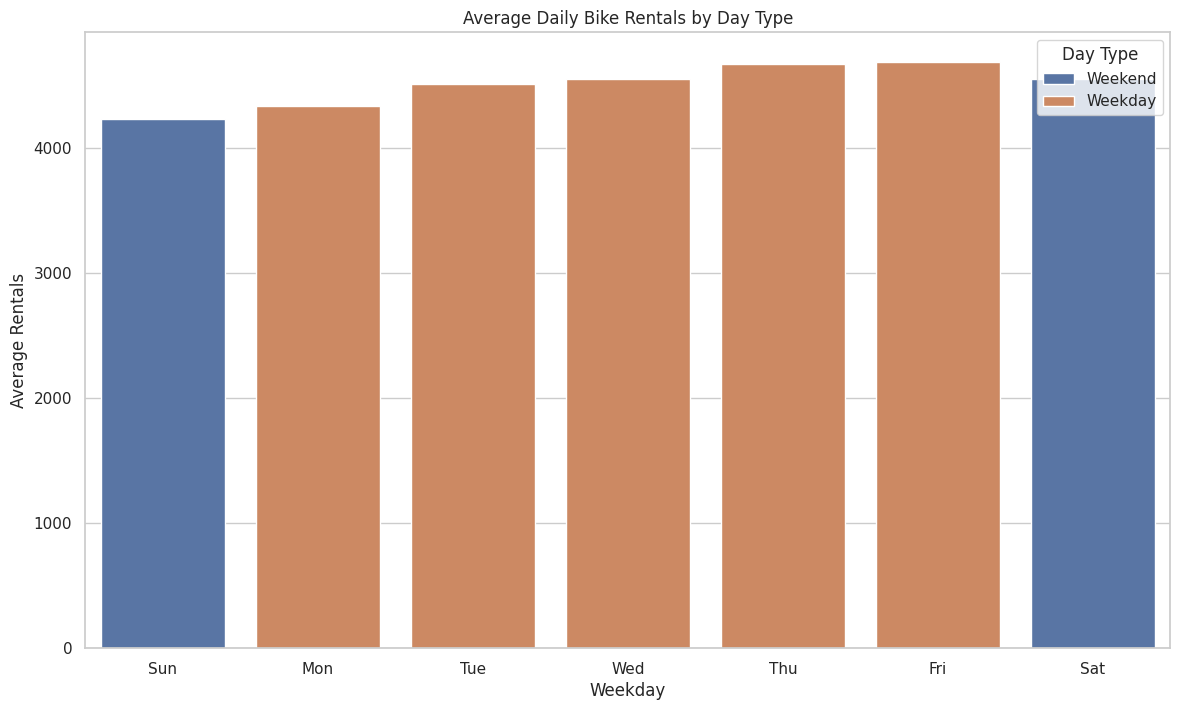

In [45]:
# Bar plot untuk melihat rata-rata penggunaan sepeda berbagi per hari
average_daily_rentals = df.groupby(['day_type', 'weekday'])['cnt'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=average_daily_rentals, x='weekday', y='cnt', hue='day_type')
plt.title('Average Daily Bike Rentals by Day Type')
plt.xlabel('Weekday')
plt.ylabel('Average Rentals')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.legend(title='Day Type', loc='upper right')
plt.show()

<ipython-input-46-14bf66db315c>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='weekday', y='cnt', hue='day_type', estimator='mean', ci=None)


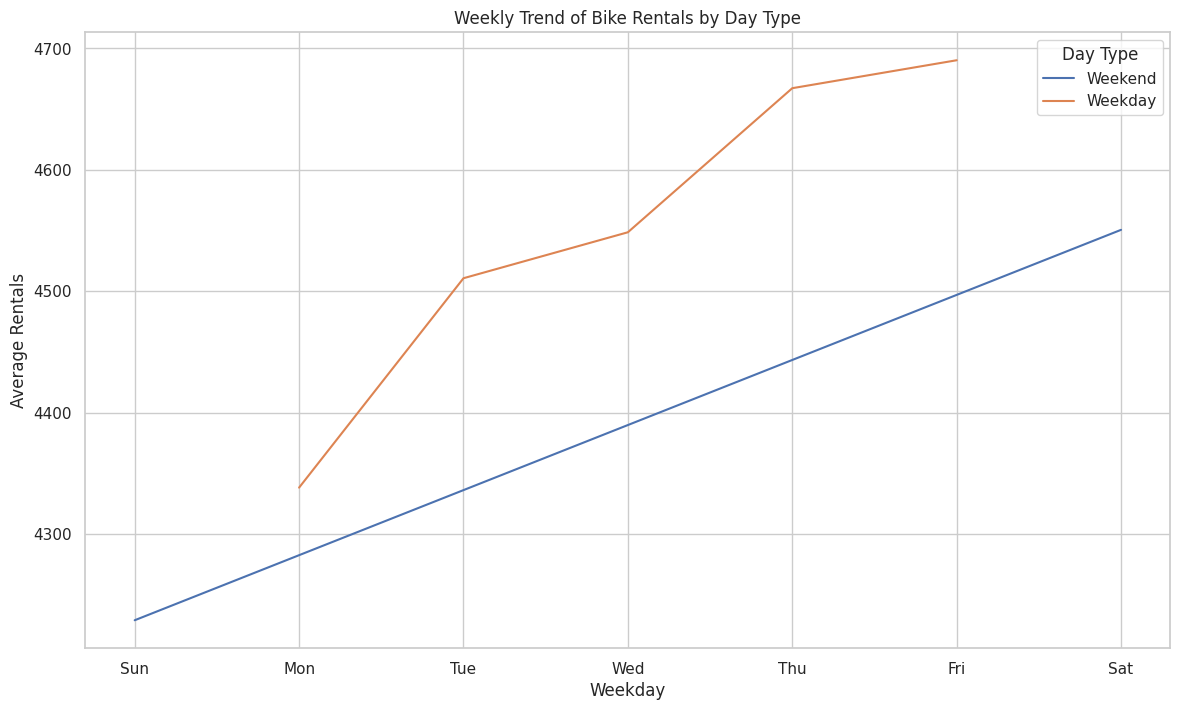

In [46]:
# Line plot untuk melihat tren mingguan penggunaan sepeda berbagi
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='weekday', y='cnt', hue='day_type', estimator='mean', ci=None)
plt.title('Weekly Trend of Bike Rentals by Day Type')
plt.xlabel('Weekday')
plt.ylabel('Average Rentals')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.legend(title='Day Type', loc='upper right')
plt.show()

In [40]:
# Menghitung rata-rata penggunaan sepeda berbagi antara hari kerja dan akhir pekan
average_rentals_by_day_type = df.groupby('day_type')['cnt'].mean()
print("Average bike rentals by day type:")
print(average_rentals_by_day_type)

Average bike rentals by day type:
day_type
Weekday    4550.566219
Weekend    4389.685714
Name: cnt, dtype: float64


## Conclusion

- Secara keseluruhan, penggunaan sepeda berbagi menunjukkan pola yang fluktuatif secara harian, mingguan, dan bulanan. Faktor-faktor seperti cuaca, event khusus, dan kebiasaan mingguan tampaknya mempengaruhi penggunaan sepeda berbagi
- Ada perbedaan signifikan dalam penggunaan sepeda berbagi antara hari kerja dan akhir pekan. Penggunaan sepeda berbagi cenderung lebih tinggi pada akhir pekan, yang mungkin disebabkan oleh waktu luang yang lebih banyak, aktivitas rekreasi, dan cuaca yang lebih mendukung.